# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*


## Библиотека pandas. Продолжение.

### Группировка и агрегирование: методы `.groupby()` и `.agg()`

Часто случается, что данные необходимо сгруппировать по какому-то признаку – по значениям определенной переменной. На входе имеется таблица (датафрейм), а на выходе хочется получить несколько таблиц: отдельная таблица для каждого значения. Давайте рассмотрим такой пример. У нас есть база данных с результатами выборов, и нам нужно сгруппировать данные по регионам. 

Для начала импортируем библиотеку pandas и загрузим файл с данными.

In [2]:
import pandas as pd

Для разнообразия загрузим файл по ссылке с Github (база большая, загрузится не моментально):

In [7]:
df = pd.read_csv("elect.csv", encoding="UTF-8")

В таблице сохранены результаты выборов президента России 2012 года. 

In [11]:
df.head()

,link,uik,kom1,kom2,kom3,kom4,kom5,1,2,3,...,18,19,20,21,22,23,а,б,в,г
0,http://www.adygei.vybory.izbirkom.ru/region/ad...,1,Республика Адыгея (Адыгея),Адыгейская,УИК №1,NaN,NaN,2383.0,2147.0,0.0,...,0.0,24.0,382.0,28.0,71.0,1066.0,NaN,NaN,NaN,NaN
1,http://www.adygei.vybory.izbirkom.ru/region/ad...,2,Республика Адыгея (Адыгея),Адыгейская,УИК №2,NaN,NaN,2865.0,2586.0,0.0,...,0.0,51.0,453.0,49.0,104.0,1174.0,NaN,NaN,NaN,NaN
2,http://www.adygei.vybory.izbirkom.ru/region/ad...,3,Республика Адыгея (Адыгея),Адыгейская,УИК №3,NaN,NaN,2821.0,2558.0,0.0,...,0.0,36.0,481.0,24.0,107.0,1025.0,NaN,NaN,NaN,NaN
3,http://www.adygei.vybory.izbirkom.ru/region/ad...,4,Республика Адыгея (Адыгея),Адыгейская,УИК №4,NaN,NaN,2069.0,1868.0,0.0,...,0.0,0.0,414.0,0.0,48.0,784.0,NaN,NaN,NaN,NaN
4,http://www.adygei.vybory.izbirkom.ru/region/ad...,5,Республика Адыгея (Адыгея),Адыгейская,УИК №5,NaN,NaN,777.0,705.0,0.0,...,0.0,19.0,138.0,4.0,7.0,286.0,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90003 entries, 0 to 90002
Data columns (total 34 columns):
link    90003 non-null object
uik     90003 non-null int64
kom1    90003 non-null object
kom2    90003 non-null object
kom3    89618 non-null object
kom4    0 non-null float64
kom5    0 non-null float64
1       89994 non-null float64
2       89994 non-null float64
3       89994 non-null float64
4       89994 non-null float64
5       89994 non-null float64
6       89994 non-null float64
7       89994 non-null float64
8       89994 non-null float64
9       89994 non-null float64
10      89994 non-null float64
11      89994 non-null float64
12      89994 non-null float64
13      89994 non-null float64
14      89994 non-null float64
15      89994 non-null float64
16      89994 non-null float64
17      89994 non-null float64
18      89994 non-null float64
19      89994 non-null float64
20      89994 non-null float64
21      89994 non-null float64
22      89994 non-null float64
23    

Таблица достаточно большая, поэтому давайте выберем те столбцы, которые понадобятся нам для работы. Какие именно? Столбцы в этой базе имеют порядковый номер строки в таблице на [сайте](http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&root=1&tvd=100100031793509&vrn=100100031793505&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100031793509&type=227) Центральной избирательной комиссии.

Выберем столбцы, которые соответствуют уровням комиссий, а также следующим показателям: общее число зарегистрированных избирателей, число недействительных бюллетеней, число действительных бюллетеней, число голосов за Жириновского, Зюганова, Миронова, Прохорова и Путина.

In [13]:
d = df[["kom1", "kom2", "kom3", "1", "9", "10", "19", "20", "21", "22", "23"]]

In [7]:
d.head()

,kom1,kom2,kom3,1,9,10,19,20,21,22,23
0,Республика Адыгея (Адыгея),Адыгейская,УИК №1,2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),Адыгейская,УИК №2,2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),Адыгейская,УИК №3,2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),Адыгейская,УИК №4,2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),Адыгейская,УИК №5,777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Теперь присвоим столбцам более информативные названия:

In [15]:
d.columns = ["region", "tik", "uik", "total", "invalid", "valid", "Zh", "Zu", "Mi", "Pr", "Pu"]

In [17]:
d.head() # опять посмотрим

,region,tik,uik,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
0,Республика Адыгея (Адыгея),Адыгейская,УИК №1,2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),Адыгейская,УИК №2,2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),Адыгейская,УИК №3,2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),Адыгейская,УИК №4,2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),Адыгейская,УИК №5,777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Посмотрим теперь, какие регионы есть в базе. Выбрать столбец *region* в таком случае будет не совсем удачно, поскольку в нем будет много повторяющихся значений. Посмотрим только на уникальные:

In [20]:
d.region.unique() # метод unique - уникальные значения

array(['Республика Адыгея (Адыгея)', 'Республика Алтай',
       'Республика Башкортостан', 'Республика Бурятия',
       'Республика Дагестан', 'Ðåñïóáëèêà Äàãåñòàí',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Республика Калмыкия', 'Карачаево-Черкесская Республика',
       'Республика Карелия', 'Республика Коми', 'Республика Марий Эл',
       'Республика Мордовия', 'Республика Саха (Якутия)',
       'Республика Северная Осетия - Алания', 'Республика Тыва',
       'Удмуртская Республика', 'Республика Хакасия',
       'Чувашская Республика - Чувашия', 'Алтайский край',
       'Забайкальский край', 'Камчатский край', 'Краснодарский край',
       'Красноярский край', 'Пермский край', 'Приморский край',
       'Ставропольский край', 'Хабаровский край', 'Õàáàðîâñêèé êðàé',
       'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'В

Видно, что в этом массиве встречаются какие-то крокозябры (названия со странной кодировкой). Давайте уберем эти строки из базы. Воспользуемся методом `str.contains()` для строк:

In [22]:
# отфильтруем с помощью условий
d = d[~d.region.str.contains("à")]  # ~ для отрицания

Сгруппируем данные по регионам и посчитаем для каждого региона явку в процентах и процент голосов за каждого кандидата. Группировка осуществляется с помощью метода `.groupby()`.

In [23]:
d.groupby('region') # пока ничего не увидели

Что выдает метод `.groupby()`? На самом деле он делает следующее: создает список, состоящий из кортежей. Каждый кортеж – это пара *название группы*-*соответствующий ей фрагмент датафрейма*.

In [24]:
# посмотрим на все сразу
for g in d.groupby('region'):
    print(g)
    break

('Алтайский край',                region                 tik        uik   total  invalid   valid  \
14416  Алтайский край            Алейская   УИК №517   577.0      2.0   368.0   
14417  Алтайский край            Алейская   УИК №518   233.0      0.0   165.0   
14418  Алтайский край            Алейская   УИК №519    46.0      0.0    36.0   
14419  Алтайский край            Алейская   УИК №520   135.0      0.0   101.0   
14420  Алтайский край            Алейская   УИК №521   185.0      0.0   146.0   
14421  Алтайский край            Алейская   УИК №522   308.0      7.0   216.0   
14422  Алтайский край            Алейская   УИК №523   550.0      1.0   370.0   
14423  Алтайский край            Алейская   УИК №524   464.0      1.0   306.0   
14424  Алтайский край            Алейская   УИК №525    97.0      1.0    71.0   
14425  Алтайский край            Алейская   УИК №526   923.0      7.0   632.0   
14426  Алтайский край            Алейская   УИК №527    82.0      0.0    56.0   
14427  Ал

В таком виде метод `.groupby()` дает нам немного. Мы же хотим не просто получать отдельные таблицы, а агрегировать данные по регионам ‒ суммировать все показатели (число избирателей, бюллетеней, голосов) по каждому региону. Тут на помощь придет метод `.agg()`, который выполняет агрегирование по группам.

In [29]:
d.groupby('region').agg('sum')

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0
Брянская область,1045083.0,6922.0,692926.0,42974.0,146340.0,23453.0,32141.0,448018.0
Владимирская область,1202174.0,8484.0,629526.0,53615.0,132400.0,41895.0,60315.0,341301.0
Волгоградская область,2003455.0,12696.0,1265720.0,87657.0,240998.0,55325.0,71142.0,810598.0
Вологодская область,987574.0,6596.0,601999.0,49492.0,93417.0,40306.0,57064.0,361720.0


Сначала в `.groupby()` мы указали переменную, по которой нужно выполнить группировку, затем в `.agg()` мы указали функцию, которую нужно выполнить. В нашем случае это `'sum'`, поскольку нам нужно просто сложить все показатели в пределах одного региона. Применять можно и другие функции, например, считать среднее:

In [31]:
d.groupby('region').agg('mean').head() # mean - среднее

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,1053.344791,6.446831,624.825994,52.610634,140.529001,24.641783,44.993555,362.051020
Амурская область,845.874840,6.012771,504.464879,50.724138,86.121328,17.361430,29.463602,320.794381
Архангельская область,1004.754065,5.611789,578.752033,52.001016,93.138211,33.763211,61.085366,338.764228
Астраханская область,1313.324232,8.715017,729.515358,37.402730,115.464164,31.732082,37.325939,507.590444
Белгородская область,968.472000,8.167200,711.811200,47.648800,168.863200,28.480800,39.845600,426.972800


Или сразу несколько статистик. которые можно указать в `.agg()` в виде списка.

In [32]:
d.groupby('region').agg(['mean', 'median']).head() # среднее и медиана

total           invalid              valid  \
                              mean  median      mean median        mean   
region                                                                    
Алтайский край         1053.344791   823.0  6.446831    4.0  624.825994   
Амурская область        845.874840   523.0  6.012771    4.0  504.464879   
Архангельская область  1004.754065   581.5  5.611789    2.0  578.752033   
Астраханская область   1313.324232  1283.5  8.715017    6.0  729.515358   
Белгородская область    968.472000   802.0  8.167200    6.0  711.811200   

                                     Zh                 Zu                Mi  \
                      median       mean median        mean median       mean   
region                                                                         
Алтайский край         495.0  52.610634   41.0  140.529001  109.5  24.641783   
Амурская область       326.0  50.724138   31.0   86.121328   52.0  17.361430   
Архангельская область  332.5  52.001016   29.0   93.138211   44.0  33.763211   
Астраханская область   692.5  37.402730   31.0  115.464164  100.5  31.732082   
Белгородская область   633.0  47.648800   41.0  168.863200  140.5  28.480800   

                                     Pr                 Pu         
                      median       mean median        mean median  
region                                                             
Алтайский край          15.0  44.993555   22.0  362.051020  305.5  
Амурская область         9.0  29.463602   12.0  320.794381  224.0  
Архангельская область   19.0  61.085366   20.5  338.764228  230.5  
Астраханская область    22.0  37.325939   22.0  507.590444  480.0  
Белгородская область    21.0  39.845600   22.0  426.972800  397.0

Кроме того, внутри `.agg()` можно указывать свои функции. Например, нас интересует разница между максимальным и минимальным значением. Сначала напишем функцию `my_diff`, которая будет определять такую разность:

In [34]:
def my_diff(x):
    return max(x) - min(x)

Проверим, как она работает:

In [35]:
my_diff([4, 6, 8]) # все верно, 8 - 4 = 4

4

Теперь используем эту функцию внутри `.agg()`:

In [36]:
d.groupby('region').agg(my_diff).head() # везде смотрим на первые 5 строк

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,3030.0,72.0,2389.0,379.0,573.0,131.0,351.0,1639.0
Амурская область,2942.0,130.0,1773.0,267.0,404.0,92.0,197.0,1201.0
Архангельская область,2953.0,76.0,1951.0,232.0,407.0,153.0,369.0,1205.0
Астраханская область,2936.0,223.0,1862.0,209.0,411.0,157.0,234.0,1367.0
Белгородская область,2998.0,71.0,2118.0,234.0,612.0,108.0,335.0,1268.0


Всё, что мы пока сделали, очень интересно, но есть проблема: все данные пока даны в абсолютных значениях, не в процентах. Это неудобно. Давайте сгруппируем данные по региону и добавим в базу с агрегированными данными новые столбцы: явка в процентах и проценты голосов за каждого кандидата.

Для этого необходимо вспомнить, как считается явка и проценты голосов. Явка считается так: суммируем число действительных и недействительных бюллетеней. Чтобы получить явку в процентах, делим явку на общее число зарегистрированных избирателей и домножаем на $100$, чтобы перевести долю в проценты. Проценты голосов за кандидатов считаем от явки, берем число голосов за кандидата, делим на явку и домножаем на $100$. Проделаем это поэтапно. 

Сначала сохраним результат агрегирования в переменную `regs` и добавим новый столбец для явки в абсолютных значениях (в голосах).

In [37]:
regs = d.groupby('region').agg('sum')

regs["turnout"] = regs.invalid + regs.valid # новый столбец - сумма двух старых

In [25]:
regs.head(3)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout
region,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0


Теперь добавим столбец с явкой в процентах:

In [39]:
regs["turnout_perc"] = regs.turnout / regs.total * 100

In [40]:
regs.head(3)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc
region,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886


Осталось проделать аналогичные операции для голосов за разных кандидатов. Но повторять одно и то же пять раз не хочется (а что бы мы делали, если бы кандидатов было больше?). Давайте напишем функцию, которая будет принимать на вход столбец, делить все его значения на значения из столбца *turnout* и переводить все в проценты.

In [42]:
def to_perc(x):
    return x / regs.turnout * 100

А теперь выберем из базы данных столбцы с голосами за кандидатов и применим к ним нашу функцию.

In [43]:
perc = regs[['Zh' ,'Zu', 'Mi', 'Pr', 'Pu']].apply(to_perc, axis = 0) # axis = 0 - по столбцам, не по строкам 

In [45]:
perc.head(3)

,Zh,Zu,Mi,Pr,Pu
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Нужно переименовать столбцы в базе `perc`. Давайте сделаем это по-умному: возьмем названия столбцов в `perc` и приклеим к ним часть с `_perc`, чтобы названия столбцов с показателями в процентах отличались от показателей в абсолютных числах.

In [46]:
old_cols = list(perc.columns)
old_cols

['Zh', 'Zu', 'Mi', 'Pr', 'Pu']

In [47]:
new_cols = [x + "_perc" for x in old_cols]
new_cols

['Zh_perc', 'Zu_perc', 'Mi_perc', 'Pr_perc', 'Pu_perc']

In [48]:
perc.columns = new_cols

In [50]:
perc.head(3)

,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Ура! Последний аккорд: соединим нашу таблицу `regs` с таблицей `perc`, чтобы все показатели были в одном месте. Способов объединять датафреймы много, но давайте обсудим их в следующий раз. А пока просто склеим две таблицы по столбцам с помощью метода `.concat()`.

In [56]:
final = pd.concat([regs, perc], axis = 1) # axis = 1 - по столбцам

In [57]:
final

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886,8.898740,15.938395,5.777772,10.453311,57.971458
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0,56.210824,5.066539,15.640668,4.298398,5.056137,68.757729
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0,899973.0,74.341685,6.618087,23.453926,3.955785,5.534277,59.303557
Брянская область,1045083.0,6922.0,692926.0,42974.0,146340.0,23453.0,32141.0,448018.0,699848.0,66.965782,6.140476,20.910255,3.351156,4.592569,64.016472
Владимирская область,1202174.0,8484.0,629526.0,53615.0,132400.0,41895.0,60315.0,341301.0,638010.0,53.071352,8.403473,20.752026,6.566511,9.453614,53.494616
Волгоградская область,2003455.0,12696.0,1265720.0,87657.0,240998.0,55325.0,71142.0,810598.0,1278416.0,63.810567,6.856688,18.851297,4.327621,5.564855,63.406434
Вологодская область,987574.0,6596.0,601999.0,49492.0,93417.0,40306.0,57064.0,361720.0,608595.0,61.625255,8.132173,15.349617,6.622795,9.376350,59.435257


Приличную базу мы получили, можно перейти к чему-то более содержательному.

### Ещё немного про визуализацию данных

В прошлый раз мы познакомились с тем, как строить графики для переменных в базе данных. Мы уже обсудили два типа графиков для количественных данных: гистограмму и ящик с усами. Давайте посмотрим на диаграммы рассеяния – графики, которые позволяют увидеть совместное распределение пары количественных показателей. 

In [58]:
import matplotlib
%matplotlib inline 

А теперь сама диаграмма рассеяния (*scatterplot*) для показателей *явка в процентах* и *процент за Зюганова*:

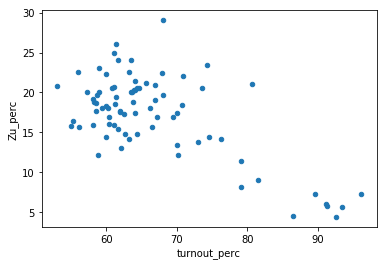

In [59]:
final.plot.scatter('turnout_perc', 'Zu_perc')

Можем привести график в порядок. Добавить заголовок и подписи к осям, плюс, изменить цвет точек. Для этого основной график сохраним в переменную `ax`, а затем применим к ней методы, которые отвечают за добавление заголовка и названиям осей *x* и *y*. 

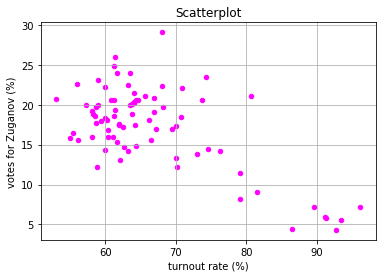

In [62]:
ax = final.plot.scatter('turnout_perc', 'Zu_perc', color = "magenta") # цвет magenta
ax.set_title('Scatterplot') # заголовок для объекта ax
ax.set_xlabel('turnout rate (%)') # подпись для оси x
ax.set_ylabel('votes for Zuganov (%)') # подпись для оси y
ax.grid()

По графику видно, что, в целом, чем выше явка, тем ниже процент голосов за Зюганова. Углубляться в разные настройки графиков и в статистику не будем, но познакомимся с примером графика средствами библиотеки pandas. Построим матрицу диаграмм рассеяния (*scatterplot matrix*), сетку с диаграммами рассеяния для всех пар показателей.

Логично будет строить такой график для переменных в базе `perc`, поскольку правильнее смотреть на связи между показателями в процентах.

In [64]:
from pandas.plotting import scatter_matrix # импортируем функцию

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1262aea90>,
      dtype=object)

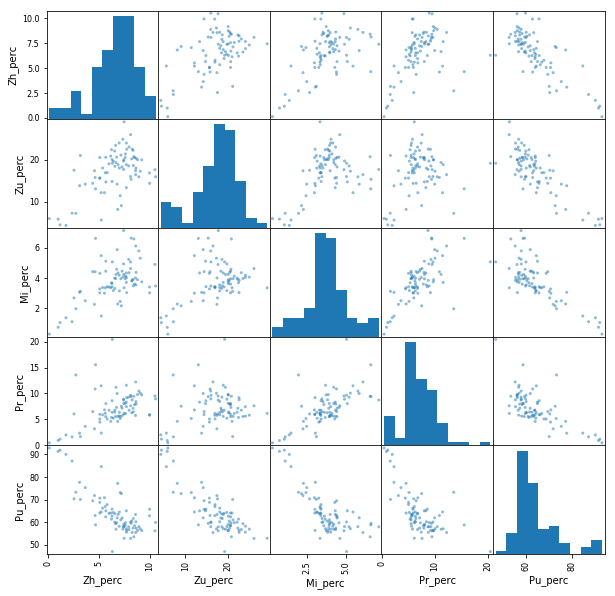

In [68]:
scatter_matrix(perc, diagonal='hist', figsize=(10, 10)) # строим график

Аргумент `diagonal` отвечает за тип графика, который будет находиться на диагонали (в нашем случае гистограмма – `'hist'`), а аргумент `figsize` – за размер графика (по горизонтали и по вертикали). На диагоналях также можно построить сглаженные графики плотности распределения показателей:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126a8e3c8>,
      dtype=object)

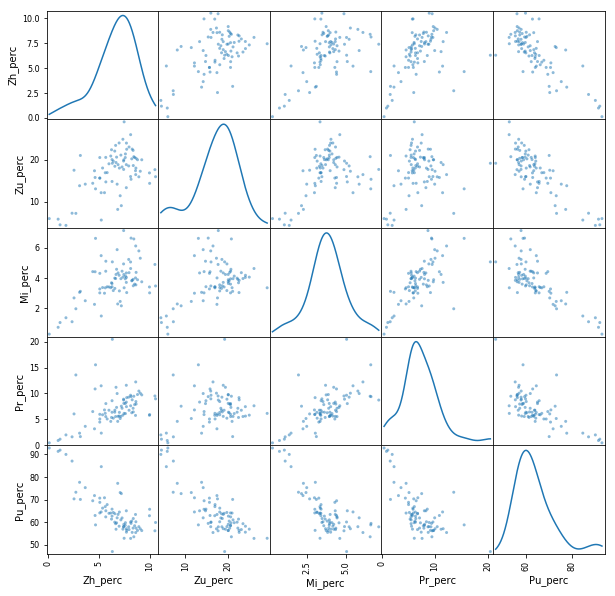

In [69]:
scatter_matrix(perc, diagonal='kde', figsize=(10, 10)) # kde - от kernel density estimation

Поиграем с цветами. Изменим цвет точек на всех диаграммах рассеяния:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1762FEC50>,
      dtype=object)

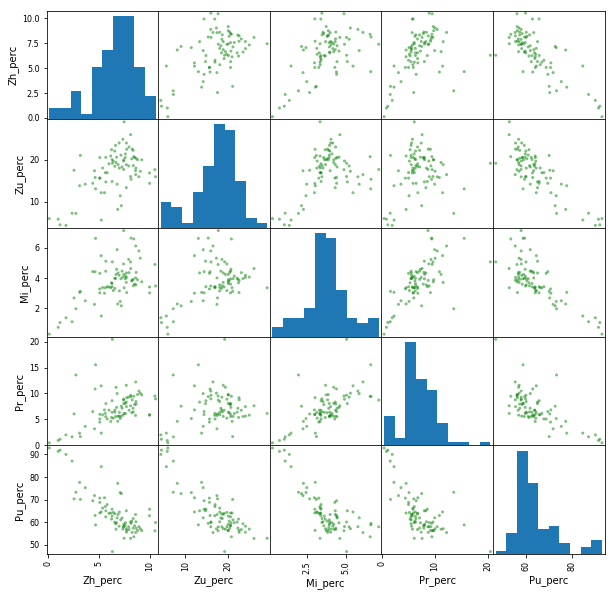

In [48]:
scatter_matrix(perc, diagonal='hist', figsize=(10, 10), color='green')

А теперь цвет гистограмм. Это сделать чуть сложнее, поскольку нужно задавать значения аргуметов как `*kwargs`, в виде словаря:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D17634B128>,
      dtype=object)

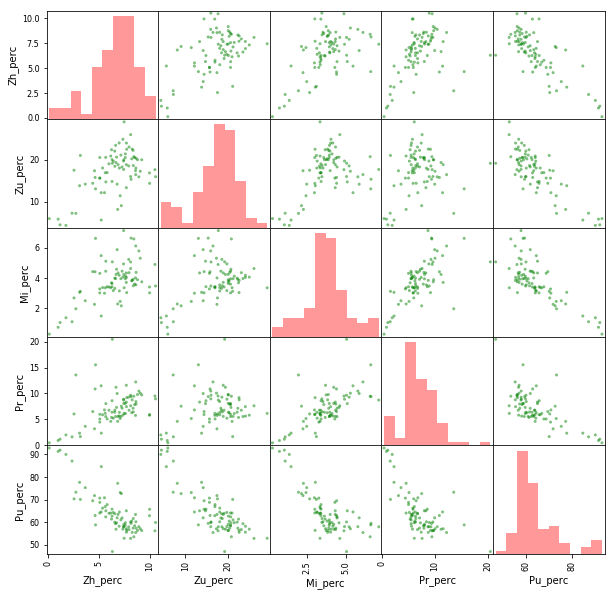

In [49]:
# заодно выставим чило столбцов - bins=10
# и прозрачность 50% - alpha=0.5

scatter_matrix(perc, diagonal='hist', figsize=(10, 10), color='green', 
               hist_kwds = {'color': 'red', 'bins' : 10, 'alpha' : 0.4})

На этом пока всё.